In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [52]:
torch.manual_seed(42)

In [53]:
df = pd.read_csv('/content/fmnist_small.csv')

In [54]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


In [55]:
df.shape

(6000, 785)

In the dataset, we have 4723 images of 28 x 28 size.

The column represents the complete image.

Each Row represents one image.

In [56]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [58]:
X_train.shape

(4800, 784)

In [59]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [60]:
y_train[0]

np.int64(7)

Visualization of Dataset

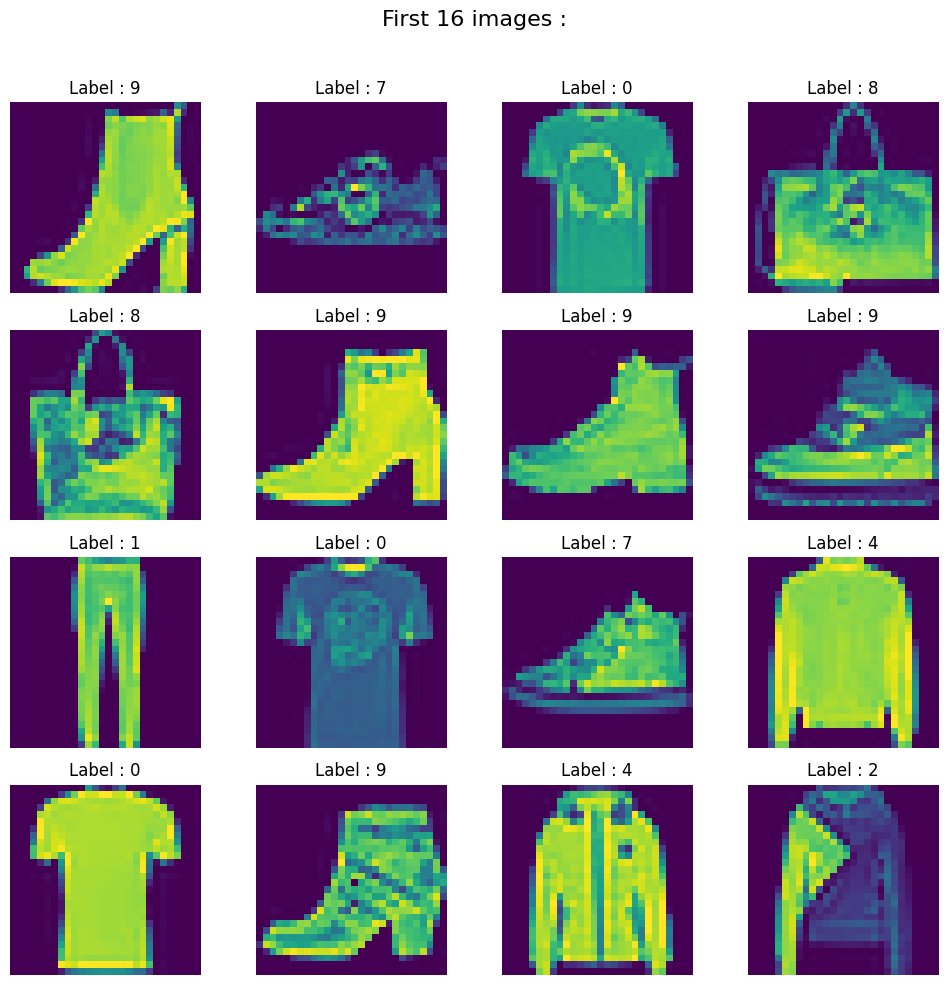

In [61]:
# create a 4 x 4 grid of images
fig, axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images :",fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label : {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [62]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,  35,  38,
         48,  54,  51,  65,  96,  30,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   1,   3,   0,  48,  88,  71, 152, 150,
        124, 121, 147, 128,  80,  78,  68,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,  68, 102,  33,  66, 137,
        140, 137, 118,  45,  38,  70,  96,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 174,  74,  46,  92,  66,  21,
         41,  92,  39,  61,  60,  57,  74,  50,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0, 118, 230, 185,  55,  14,  66,  73,
         44, 107,  67,  69,  63,  53,  47,  71,  22,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 175, 198, 202, 233,  85,   7,  42,
         36,  43,  32,  43,  34,  47,  56,  43,  35,   0,   0,   0,   0,
          0,   0],
       [  

In [63]:
# Scaling
X_train = X_train/255.0
X_test = X_test/255.0

In [64]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [65]:
print(len(X_train))
print(len(X_train[0]))

4800
784


In [66]:
# creating custom dataset class

class CustomDataset(Dataset):

  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype = torch.float32)
    self.labels = torch.tensor(labels,dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
     return self.features[index],self.labels[index]

In [67]:
# creating train_dataset object
train_dataset = CustomDataset(X_train,y_train)

In [68]:
train_dataset[0][1] # [[img,label]]

tensor(7)

In [69]:
# creating test_dataset object
test_dataset = CustomDataset(X_test,y_test)

In [70]:
test_dataset[0][1]

tensor(8)

In [71]:
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=32)
test_loader = DataLoader(test_dataset,shuffle=False,batch_size=32)

In [72]:
# define NN class
class MyNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [73]:
# Set Learning Rate and Epochs:
learning_rate = 0.1
epochs = 100


In [74]:
# initate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [75]:
# training loop
for epoch in range(epochs):
  total_epoch_loss = 0;
  for batch_features,batch_labels in train_loader:
    #forward pass
    y_pred = model(batch_features)
    #calculate loss
    loss = criterion(y_pred,batch_labels)

    # zero grad
    optimizer.zero_grad()
    #back prop
    loss.backward()
    #update grad
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch : {epoch + 1}, Loss: {avg_loss}")

Epoch : 1, Loss: 1.319169979095459
Epoch : 2, Loss: 0.7719793631633123
Epoch : 3, Loss: 0.6366913809378942
Epoch : 4, Loss: 0.5749017469088237
Epoch : 5, Loss: 0.5295088335871696
Epoch : 6, Loss: 0.49309861044089
Epoch : 7, Loss: 0.4677371331055959
Epoch : 8, Loss: 0.44116532931725183
Epoch : 9, Loss: 0.43606596340735754
Epoch : 10, Loss: 0.39632477874557176
Epoch : 11, Loss: 0.3876285160581271
Epoch : 12, Loss: 0.37248981217543287
Epoch : 13, Loss: 0.3446650518476963
Epoch : 14, Loss: 0.34105473751823107
Epoch : 15, Loss: 0.3219345329205195
Epoch : 16, Loss: 0.3110303937395414
Epoch : 17, Loss: 0.3009671437740326
Epoch : 18, Loss: 0.28450024222334225
Epoch : 19, Loss: 0.2894219729801019
Epoch : 20, Loss: 0.27808762951443594
Epoch : 21, Loss: 0.2717828409870466
Epoch : 22, Loss: 0.2586174541215102
Epoch : 23, Loss: 0.2507885235051314
Epoch : 24, Loss: 0.2633999908467134
Epoch : 25, Loss: 0.22970992577572663
Epoch : 26, Loss: 0.22080461050073305
Epoch : 27, Loss: 0.22937816853324572
Epo

In [76]:
# Evaluation
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [81]:
total = 0
correct = 0

with torch.no_grad():

  for batch_features,batch_labels in test_loader:

      # forward
      y_pred = model(batch_features)

      _,prediction = torch.max(y_pred,1)

      total = total + batch_labels.shape[0]

      correct = correct + (prediction == batch_labels).sum().item()


print(correct/total)

0.8458333333333333


How to improve accuracy.

1. use full dataset
2. use different optimizers
3. tryout different learning rates
4. use regularization
5. use dropout
6. use batch normalization
7. use hyperparameter tuning of model

TypeError: 'DataLoader' object is not subscriptable